In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import cmasher as cmr

In [2]:
df = pd.read_csv("../data/input/depletion_voltage_LGAD_verbose.txt")

In [3]:
for idx, col in enumerate(df.columns.to_list()[0].split()):
    list = []
    for row in df.iloc[:,0]:
        list.append(float(row.split()[idx+1]))
    df[col] = list
df.drop(df.columns.to_list()[0], axis=1, inplace=True)

In [4]:
df["W"]=df["W"]*1e6

In [5]:
df

,V,V_err,C,C_err,V_abs,1_C2,1_C2_err,1_C2_F,1_C2_err_F,derivative,derivative2_C,derivative2_V,derivative_err,NB,NB_err,W,W_err
0,0.0,0.1,326.8,0.5,0.0,0.000009,2.865193e-08,9.363450e+18,2.865193e+16,6.446264e+18,-0.156691,-1.010073e+18,1.011070e+17,1.869537e+22,2.932292e+20,0.000000,NaN
1,-1.0,0.1,251.5,0.5,1.0,0.000016,6.286169e-08,1.580971e+19,6.286169e+16,5.436191e+18,-0.244623,-1.180017e+18,1.189995e+17,2.216907e+22,4.852860e+20,0.241531,1.236250e-08
2,-2.0,0.1,222.3,0.5,2.0,0.000020,9.102939e-08,2.023583e+19,9.102939e+16,4.086229e+18,-0.216006,-9.385004e+17,9.588775e+16,2.949303e+22,6.920856e+20,0.296143,8.178401e-09
3,-3.0,0.1,204.2,0.5,3.0,0.000024,1.174445e-07,2.398217e+19,1.174445e+17,3.559190e+18,-0.114257,-4.160581e+17,4.371623e+16,3.386031e+22,4.158938e+20,0.338502,6.012524e-09
4,-4.0,0.1,191.2,0.5,4.0,0.000027,1.430660e-07,2.735421e+19,1.430660e+17,3.254113e+18,-0.077577,-2.553809e+17,2.784556e+16,3.703476e+22,3.169077e+20,0.373742,4.937859e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-34.0,0.1,2.6,0.2,34.0,0.147929,2.275831e-02,1.479290e+23,2.275831e+22,-2.011834e+21,NaN,2.354080e+20,NaN,-5.990318e+19,NaN,NaN,NaN
67,-37.0,0.1,2.5,0.2,37.0,0.160000,2.560000e-02,1.600000e+23,2.560000e+22,4.280353e+21,0.191122,6.377749e+20,4.893150e+21,2.815545e+19,3.218633e+19,41.225510,2.356385e-05
68,-40.0,0.1,2.4,0.2,40.0,0.173611,2.893519e-02,1.736111e+23,2.893519e+22,1.814815e+21,NaN,-4.022614e+20,NaN,6.640638e+19,NaN,27.910750,NaN
69,-45.0,0.1,2.5,0.2,45.0,0.160000,2.560000e-02,1.600000e+23,2.560000e+22,3.300046e+21,-0.207415,7.507499e+20,5.310347e+21,3.651927e+19,5.876585e+19,39.920100,3.211922e-05


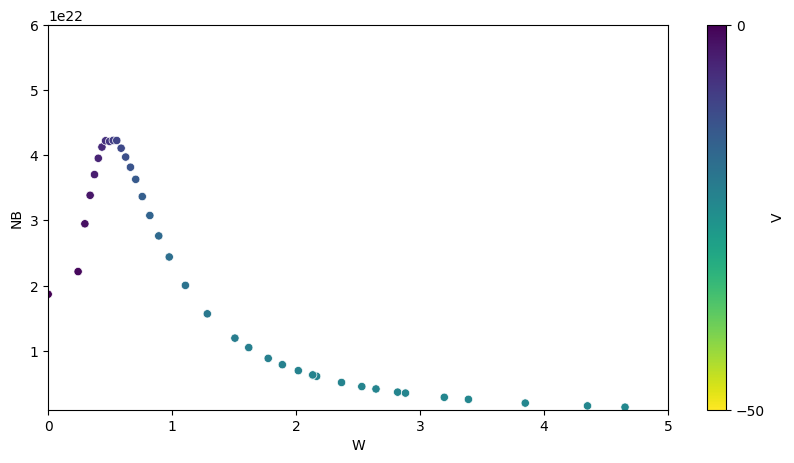

In [9]:
# Create a scatterplot
f, ax = plt.subplots(figsize=(10, 5))
scatter = sns.scatterplot(data=df, x="W", y="NB", hue="V", palette="viridis_r", ax=ax, legend=None)

# Set the y-axis to use a log scale
#ax.set_yscale('log')

# Create a ScalarMappable to map your values to colors
norm = plt.Normalize(df['V'].min(), df['V'].max())
sm = cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])

# Add a colorbar
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", ticks=[df['V'].min(), df['V'].max()])
cbar.set_label("V")

# Set the y-axis to use a log scale and set the y range
#ax.set_yscale('log')
ax.set_ylim([1e21, 0.6e23])
ax.set_xlim([0, 5])

plt.show()


In [7]:
dfPIN = pd.read_csv("../data/input/depletion_voltage_PiN_verbose.txt")

In [8]:
for idx, col in enumerate(dfPIN.columns.to_list()[0].split()):
    list = []
    for row in dfPIN.iloc[:,0]:
        list.append(float(row.split()[idx+1]))
    dfPIN[col] = list
dfPIN.drop(dfPIN.columns.to_list()[0], axis=1, inplace=True)

In [9]:
dfPIN["W"]=dfPIN["W"]*1e6

In [10]:
dfPIN

,V,V_err,C,C_err,V_abs,1_C2,1_C2_err,1_C2_F,1_C2_err_F,derivative,derivative2_C,derivative2_V,derivative_err,NB,NB_err,W,W_err
0,0.4,0.1,66.00,1.00,0.4,0.000230,0.000007,2.295684e+20,6.956619e+18,-1.133671e+21,-8.872041,1.005798e+22,1.007690e+21,-1.063053e+20,9.449192e+19,NaN,NaN
1,0.3,0.1,54.00,1.00,0.3,0.000343,0.000013,3.429355e+20,1.270132e+19,-2.139469e+21,-8.724633,1.810648e+22,1.814036e+21,-5.632953e+19,4.776128e+19,NaN,NaN
2,0.2,0.1,39.00,1.00,0.2,0.000657,0.000034,6.574622e+20,3.371601e+19,-4.754967e+21,-13.410019,8.855864e+22,8.867398e+21,-2.534514e+19,4.726540e+19,NaN,NaN
3,0.1,0.1,27.80,0.10,0.1,0.001294,0.000009,1.293929e+21,9.308841e+18,-1.985120e+22,NaN,NaN,NaN,-6.070933e+18,NaN,NaN,NaN
4,0.0,0.1,14.70,0.10,0.0,0.004628,0.000063,4.627701e+21,6.296192e+19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.1,0.1,10.20,0.10,0.1,0.009612,0.000188,9.611688e+21,1.884645e+20,8.188145e+22,NaN,NaN,NaN,1.471826e+18,NaN,9.0,NaN
6,-0.2,0.1,6.90,0.10,0.2,0.021004,0.000609,2.100399e+22,6.088113e+20,9.083045e+22,-4.078530,-1.913441e+23,1.929485e+22,1.326816e+18,2.818516e+17,14.0,3.792533e-06
7,-0.3,0.1,6.00,0.10,0.3,0.027778,0.000926,2.777778e+22,9.259259e+20,4.361263e+22,-5.954374,-2.912579e+23,2.964301e+22,2.763312e+18,1.878192e+18,12.0,4.485106e-06
8,-0.4,0.1,5.80,0.10,0.4,0.029727,0.001025,2.972652e+22,1.025052e+21,3.257888e+22,-3.344951,-7.551717e+21,3.510927e+21,3.699185e+18,3.986499e+17,12.0,1.609692e-06
9,-0.5,0.1,5.40,0.10,0.5,0.034294,0.001270,3.429355e+22,1.270132e+21,4.210228e+22,1.312115,6.032921e+22,6.258879e+21,2.862440e+18,4.255272e+17,15.0,1.872738e-06


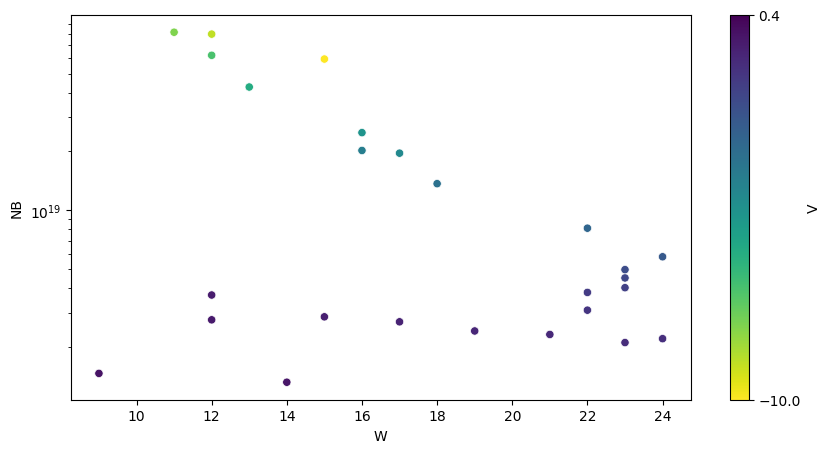

In [11]:
# Create a scatterplot
f, ax = plt.subplots(figsize=(10, 5))
scatter = sns.scatterplot(data=dfPIN, x="W", y="NB", hue="V", palette="viridis_r", ax=ax, legend=None)

# Set the y-axis to use a log scale
ax.set_yscale('log')

# Create a ScalarMappable to map your values to colors
norm = plt.Normalize(dfPIN['V'].min(), dfPIN['V'].max())
sm = cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])

# Add a colorbar
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", ticks=[dfPIN['V'].min(), dfPIN['V'].max()])
cbar.set_label("V")

plt.show()


In [7]:
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter(useMathText=True)

In [3]:
PinDF = pd.read_csv("../data/output/depletion_voltage_PiN_verbose.txt", delim_whitespace=True, index_col=0)
LGADDF = pd.read_csv("../data/output/depletion_voltage_LGAD_verbose.txt", delim_whitespace=True, index_col=0)
StripDF = pd.read_csv("../data/output/depletion_voltage_Strip_verbose.txt", delim_whitespace=True, index_col=0)

PinDF["W"]=PinDF["W"]*1e6
LGADDF["W"]=LGADDF["W"]*1e6  
StripDF["W"]=StripDF["W"]*1e6

PinDF["NB"]=PinDF["NB"]*1e-6
LGADDF["NB"]=LGADDF["NB"]*1e-6
StripDF["NB"]=StripDF["NB"]*1e-6

PinDF.query(' V > -1.6', inplace=True)
LGADDF.query('V >= -23.1', inplace=True)
StripDF.query('V < 60', inplace=True)

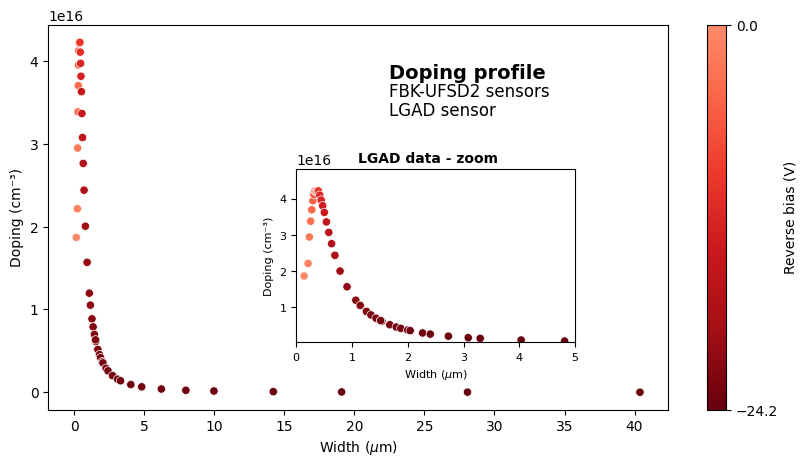

In [14]:
f, ax = plt.subplots(figsize=(10, 5))
cmap = cmr.get_sub_cmap('Reds_r', 0.0, .6)
scatter1 = sns.scatterplot(data=LGADDF, x="W", y="NB", hue="V", palette=cmap, ax=ax, label="LGAD", color="red", alpha=1, legend=None)

# Set the y-axis to use a log scale
#ax.set_yscale('log')
ax.set_xlabel("Width ($\mu$m)")
ax.set_ylabel("Doping (cm⁻³)")

# Add text on the plot
ax.text(0.55, 0.9, "Doping profile", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
ax.text(0.55, 0.85, "FBK-UFSD2 sensors", transform=ax.transAxes, fontsize=12, va='top')
ax.text(0.55, 0.8, "LGAD sensor", transform=ax.transAxes, fontsize=12, va='top')

# Create a ScalarMappable to map your values to colors
norm1 = plt.Normalize(LGADDF['V'].min(), LGADDF['V'].max())
sm1 = cm.ScalarMappable(cmap=cmap, norm=norm1)
sm1.set_array([])

axins = ax.inset_axes([0.4, 0.175, 0.45, 0.45])
sns.scatterplot(data=LGADDF[LGADDF['W'] < 5], x="W", y="NB", hue="V", palette=cmap, ax=axins, label="LGAD", color="red", alpha=1, legend=None)
axins.set_xlim(0, 5)
axins.set_ylim(3e14, 4.83e16)
axins.set_xlabel("Width ($\mu$m)", fontsize=8)
axins.tick_params(axis='x', labelsize=8)
axins.tick_params(axis='y', labelsize=8)
axins.set_ylabel("Doping (cm⁻³)", fontsize=8)
axins.text(0.5, 0.67, "LGAD data - zoom", transform=ax.transAxes, fontsize=10, fontweight='bold', va='top')
#ax.indicate_inset_zoom(axins)

# Add colorbars
cbar1 = plt.colorbar(sm1, ax=ax, orientation="vertical", ticks=[LGADDF['V'].min(), LGADDF['V'].max()])
cbar1.set_label("Reverse bias (V)")

plt.savefig("../data/output/Figures/doping_prof_LGAD.pdf", bbox_inches='tight')


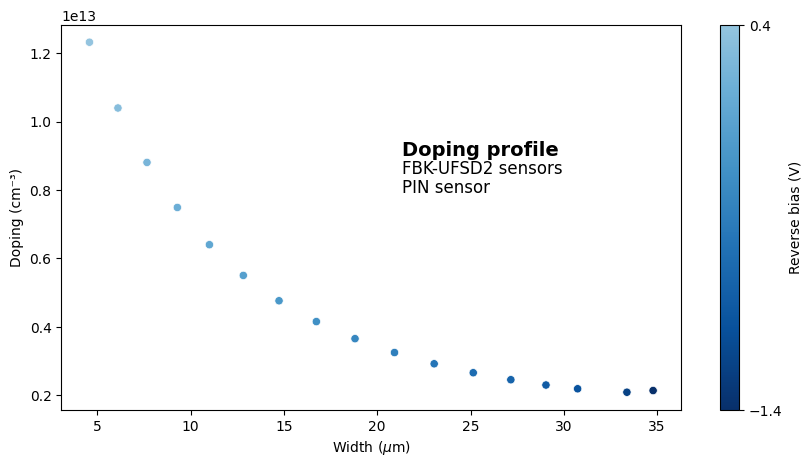

In [134]:
f, ax = plt.subplots(figsize=(10, 5))
cmap = cmr.get_sub_cmap('Blues_r', 0.0, .6)
scatter1 = sns.scatterplot(data=PinDF, x="W", y="NB", hue="V", palette=cmap, ax=ax, label="PIN", color="blue", legend=None)

# Set the y-axis to use a log scale
#ax.set_yscale('log')
ax.set_xlabel("Width ($\mu$m)")
ax.set_ylabel("Doping (cm⁻³)")

# Add text on the plot
ax.text(0.55, 0.7, "Doping profile", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
ax.text(0.55, 0.65, "FBK-UFSD2 sensors", transform=ax.transAxes, fontsize=12, va='top')
ax.text(0.55, 0.6, "PIN sensor", transform=ax.transAxes, fontsize=12, va='top')

# Create a ScalarMappable to map your values to colors
norm1 = plt.Normalize(PinDF['V'].min(), PinDF['V'].max())
sm1 = cm.ScalarMappable(cmap=cmap, norm=norm1)
sm1.set_array([])

# Add colorbars
cbar1 = plt.colorbar(sm1, ax=ax, orientation="vertical", ticks=[PinDF['V'].min(), PinDF['V'].max()])
cbar1.set_label("Reverse bias (V)")

plt.savefig("../data/output/Figures/doping_prof_PIN.pdf", bbox_inches='tight')

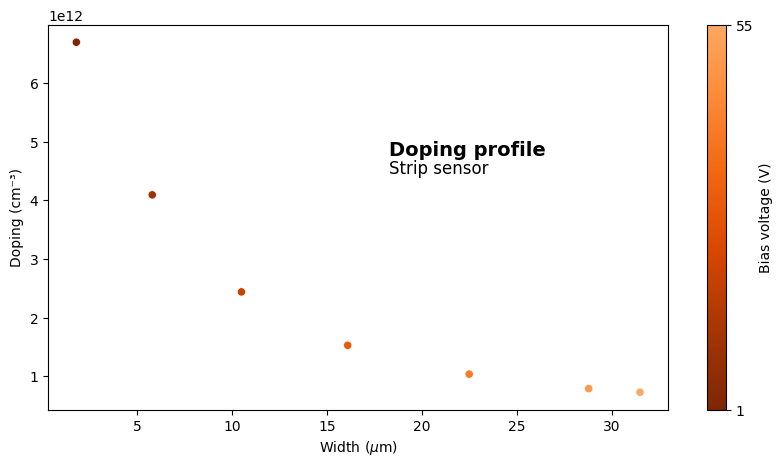

In [17]:
# Create a scatterplot
f, ax = plt.subplots(figsize=(10, 5))
cmap = cmr.get_sub_cmap('Oranges_r', 0.0, .6)
scatter = sns.scatterplot(data=StripDF, x="W", y="NB", hue="V", palette=cmap, ax=ax, legend=None)

# Set the y-axis to use a log scale
#ax.set_yscale('log')
ax.set_xlabel("Width ($\mu$m)")
ax.set_ylabel("Doping (cm⁻³)")

# Add text on the plot
ax.text(0.55, 0.7, "Doping profile", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
ax.text(0.55, 0.65, "Strip sensor", transform=ax.transAxes, fontsize=12, va='top')

# Create a ScalarMappable to map your values to colors
norm = plt.Normalize(StripDF['V'].min(), StripDF['V'].max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add a colorbar
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", ticks=[StripDF['V'].min(), StripDF['V'].max()])
cbar.set_label("Bias voltage (V)")

plt.savefig("../data/output/Figures/doping_prof_Strip.pdf", bbox_inches='tight')



In [6]:
LGADDF = pd.read_csv("../data/output/depletion_voltage_LGAD_verbose.txt", delim_whitespace=True, index_col=0)
StripDF = pd.read_csv("../data/output/depletion_voltage_Strip_verbose.txt", delim_whitespace=True, index_col=0)

LGADDF["W"]=LGADDF["W"]*1e6  
StripDF["W"]=StripDF["W"]*1e6

LGADDF["NB"]=LGADDF["NB"]*1e-6
StripDF["NB"]=StripDF["NB"]*1e-6

StripDF.query('V < 60', inplace=True)
LGADDF.query('V >= -24.2', inplace=True)
LGADDF["W"]=LGADDF["W"]*0.7   # put this in a.u. -> better comparison
StripDF["W"]=StripDF["W"]/10

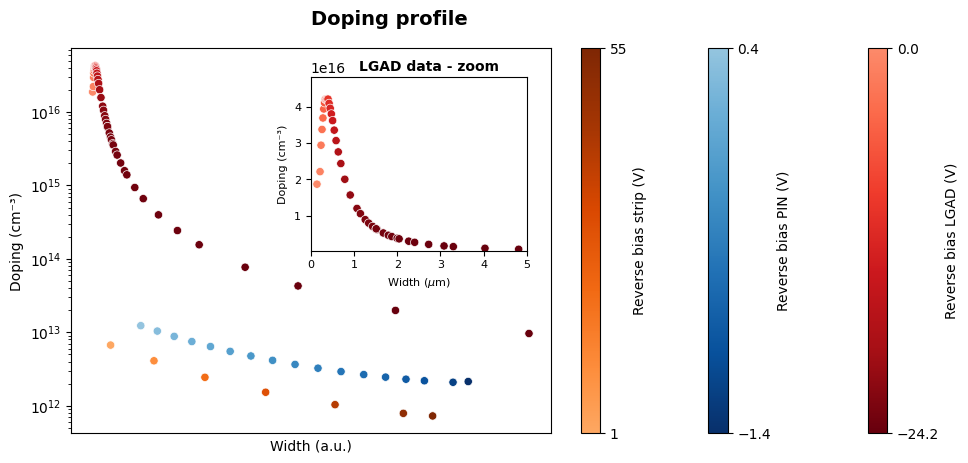

In [10]:
# Create a scatterplot
f, ax = plt.subplots(figsize=(15, 5))
ax.yaxis.set_major_formatter(formatter)

cmap1 = cmr.get_sub_cmap('Reds_r', 0.0, .6)
cmap3 = cmr.get_sub_cmap('Oranges', 0.4, 1)
cmap2 = cmr.get_sub_cmap('Blues_r', 0.0, .6)

scatter1 = sns.scatterplot(data=LGADDF, x="W", y="NB", hue="V", palette=cmap1, ax=ax, label="LGAD", color="red", legend=None)
scatter2 = sns.scatterplot(data=PinDF, x="W", y="NB", hue="V", palette=cmap2, ax=ax, label="PIN", color="blue", legend=None)
scatter3 = sns.scatterplot(data=StripDF, x="W", y="NB", hue="V", palette=cmap3, ax=ax, label="Strip", color="orange", legend=None)

# Set the y-axis to use a log scale
ax.set_yscale('log')
ax.set_xlabel("Width (a.u.)")
ax.set_xticks([])
ax.set_ylabel("Doping (cm⁻³)")

# Add title
ax.text(0.5, 1.1, "Doping profile", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')

# Add text on the plot
#ax.text(0.55, 0.8, "Doping profile", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
#ax.text(0.55, 0.75, "FBK-UFSD2 sensors", transform=ax.transAxes, fontsize=12, va='top')

# Create a ScalarMappable to map your values to colors
norm1 = plt.Normalize(LGADDF['V'].min(), LGADDF['V'].max())
sm1 = cm.ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])

norm2 = plt.Normalize(PinDF['V'].min(), PinDF['V'].max())
sm2 = cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])

norm3 = plt.Normalize(StripDF['V'].min(), StripDF['V'].max())
sm3 = cm.ScalarMappable(cmap=cmap3, norm=norm3)
sm3.set_array([])

# Add a zoomed-in panel to the top right part of the plot
axins = ax.inset_axes([0.5, 0.475, 0.45, 0.45])
sns.scatterplot(data=LGADDF[LGADDF['W'] < 5], x="W", y="NB", hue="V", palette=cmap, ax=axins, label="LGAD", color="red", alpha=1, legend=None)
axins.set_xlim(0, 5)
axins.set_ylim(3e14, 4.83e16)
axins.set_xlabel("Width ($\mu$m)", fontsize=8)
axins.tick_params(axis='x', labelsize=8)
axins.tick_params(axis='y', labelsize=8)
axins.set_ylabel("Doping (cm⁻³)", fontsize=8)
axins.text(0.6, 0.97, "LGAD data - zoom", transform=ax.transAxes, fontsize=10, fontweight='bold', va='top')
#ax.indicate_inset_zoom(axins)

# Add colorbars
cbar1 = plt.colorbar(sm1, ax=ax, orientation="vertical", ticks=[LGADDF['V'].min(), LGADDF['V'].max()])
cbar1.set_label("Reverse bias LGAD (V)")

cbar2 = plt.colorbar(sm2, ax=ax, orientation="vertical", ticks=[PinDF['V'].min(), PinDF['V'].max()])
cbar2.set_label("Reverse bias PIN (V)")

cbar3 = plt.colorbar(sm3, ax=ax, orientation="vertical", ticks=[StripDF['V'].min(), StripDF['V'].max()])
cbar3.set_label("Reverse bias strip (V)")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, right=0.75)

plt.savefig("../data/output/Figures/doping_prof_comp.pdf", bbox_inches='tight')